<a href="https://colab.research.google.com/github/Saniyashaikh1505/Machine-Learning-Projects/blob/main/P7_Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [169]:
gold_data = pd.read_csv('/content/drive/MyDrive/Data Analysis Portfolio - Saniya Shaikh/Machine Learning Projects - Python/Python Data File/gld_price_data.csv')

gold_data.head()

gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [170]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [171]:
#Getting Statistical measures of the Data

gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# Correlation :

1. Positive
2. Negative

In [172]:
corr = gold_data.drop('Date', axis=1).corr()

<Axes: >

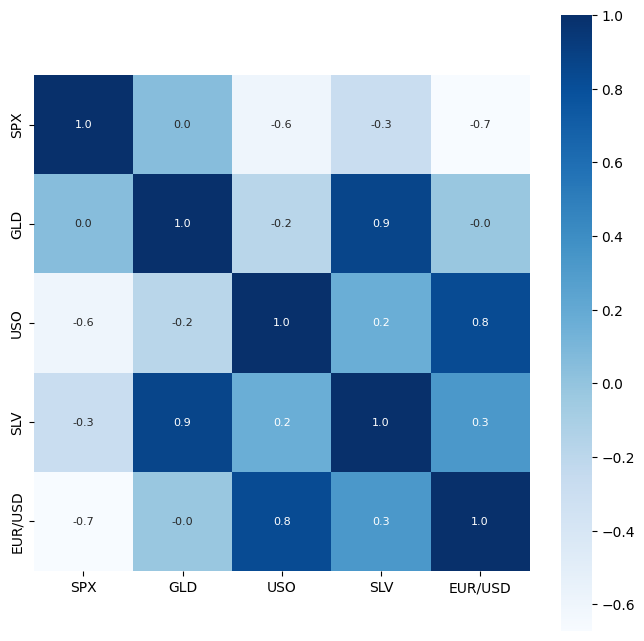

In [173]:
#Constructing the Heat Map to understand the correlation

plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [174]:
# Correlation values of GLD
print(corr['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipython-input-3172328133.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color = 'green')


<Axes: xlabel='GLD', ylabel='Density'>

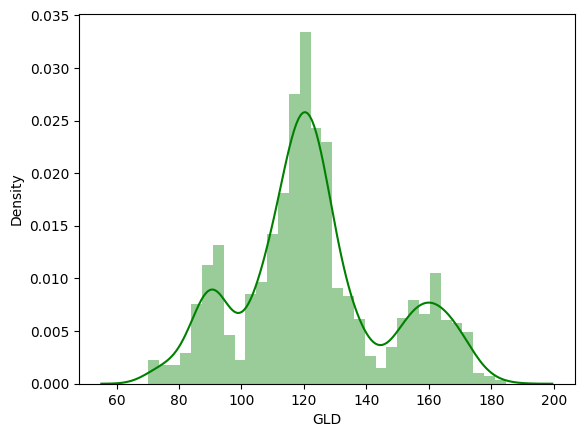

In [175]:
# Check the distribution of the Gold price
sns.distplot(gold_data['GLD'], color = 'green')

#Spliting Training and Test Data

In [176]:
X = gold_data.drop(['Date','GLD'] , axis = 1)
Y = gold_data['GLD']

In [177]:
X_train , X_test , Y_train , Y_test = train_test_split(X, Y,  test_size = 0.2 , random_state = 2)

# Model Training : Random Forest Regressor

In [178]:
model= RandomForestRegressor(n_estimators=100)

In [179]:
#Training the model
model.fit(X_train,Y_train)

RandomForestRegressor()

In [180]:
#Model Evaluation - Prediction on Test Data

test_data_prediction = model.predict(X_test)
test_data_prediction

array([168.65499914,  81.7004    , 116.20060054, 127.70090077,
       120.77270156, 154.82439784, 150.09519847, 126.19720004,
       117.69559853, 126.12310039, 116.50210103, 172.25660047,
       141.21099843, 168.06589886, 115.13960006, 117.94870033,
       136.44420351, 170.06030084, 159.73730306, 159.08099873,
       155.24280065, 125.36860057, 176.63019906, 157.04110323,
       125.13490044,  93.64399941,  77.27330009, 120.30989995,
       119.0684993 , 167.39579994,  88.07840066, 125.36280045,
        91.27040061, 117.55640026, 121.0488999 , 136.25040151,
       115.50720139, 115.51370034, 146.91339999, 106.88200132,
       104.39480227,  87.10159783, 126.54300023, 118.05689973,
       153.48379934, 119.51530032, 108.32910002, 108.0788981 ,
        93.21960102, 126.92939816,  74.57850035, 113.56509895,
       121.20820016, 111.46339903, 118.7762991 , 120.89839945,
       159.80689964, 167.95310074, 146.89959749,  85.59109858,
        94.36320014,  86.86999892,  90.50970007, 118.96

In [181]:
# R Square error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R Square error : ", error_score)

R Square error :  0.9896138411608347


# Compare the Actual and Predicted Values

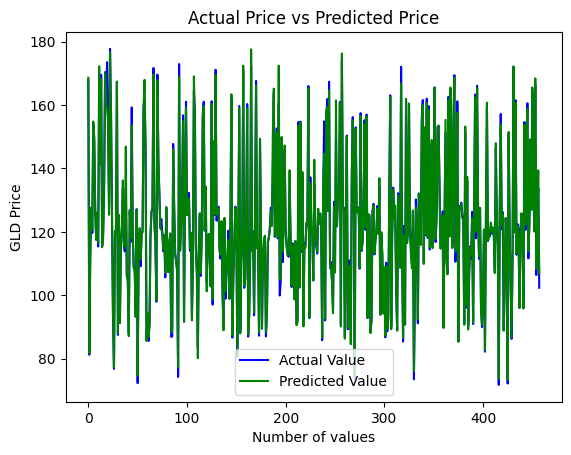

In [182]:
Y_test = list(Y_test)
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color = 'green', label = 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()